# **Exercício 03**

## Imports

In [169]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.lib import scimath as SM
import dslab as ds

## Parâmetros

In [170]:
n1 = 1.5
n2 = 1.495
n3 = 1.0
n4 = 1.495
n5 = 1.495

p2 = (n1/n2)**2
p3 = (n1/n3)**2
p4 = (n1/n4)**2
p5 = (n1/n5)**2

lmbd = 0.8e-6
a = 1e-6
b = 5e-6

numOfPoints = 1000

k0 = (2*np.pi)/lmbd
clrs = ['b','r','g']

In [171]:
kx = np.linspace(0, k0*SM.sqrt(n1**2-n2**2), numOfPoints)
ky = np.linspace(0, k0*SM.sqrt(n1**2-n2**2), numOfPoints)
gamma_2 = SM.sqrt(k0**2*(n1**2-n2**2)-kx**2)
gamma_3 = SM.sqrt(k0**2*(n1**2-n3**2)-kx**2)
gamma_4 = SM.sqrt(k0**2*(n1**2-n4**2)-ky**2)
gamma_5 = SM.sqrt(k0**2*(n1**2-n5**2)-ky**2)

## E<sub>nm</sub> modes Marcatili

In [172]:
# Ex_nm modes
kx_exSol = ds.mercatilli(n1, n2, n3, lmbd, a, 'TM', 'none', 0.5)
ky_exSol = ds.mercatilli(n1, n4, n5, lmbd, b, 'TE', 'none', 0.1)

# Ey_nm modes
kx_eySol = ds.mercatilli(n1, n2, n3, lmbd, a, 'TE', 'none', 0.5)
ky_eySol = ds.mercatilli(n1, n4, n5, lmbd, b, 'TM', 'none', 0.1)

c:\Users\Caio\Documents\GitHub\TEEE-2021.1\Subject Exercises\Exercício 03\dslab.py:81: RuntimeWarning: invalid value encountered in sqrt
  gamma_c = SM.sqrt((k0*(nf-nc))**2)


ValueError: cannot convert float NaN to integer

In [ ]:
# Ex_nm modes
fy_ex = np.tan(ky*b)
fy_ex = fy_ex - ky*(gamma_4+gamma_5)/(ky**2 - gamma_4*gamma_5)
fy_ex[:-1][np.diff(fy_ex) > 5] = np.nan

fx_ex = np.tan(kx*a)
fx_ex = fx_ex - kx*(gamma_2*p2 + gamma_3*p3)/(kx**2 - p2*p3*gamma_2*gamma_3)
fx_ex[:-1][np.diff(fx_ex) > 5] = np.nan

# Ey_nm modes
fy_ey = np.tan(ky*b)
fy_ey = fy_ey - ky*(gamma_4*p4 + gamma_5*p5)/(ky**2 - p4*p5*gamma_4*gamma_5)
fy_ey[:-1][np.diff(fy_ey) > 5] = np.nan

fx_ey = np.tan(kx*a)
fx_ey = fx_ey - kx*(gamma_2+gamma_3)/(kx**2 - gamma_2*gamma_3)
fx_ey[:-1][np.diff(fx_ey) > 5] = np.nan

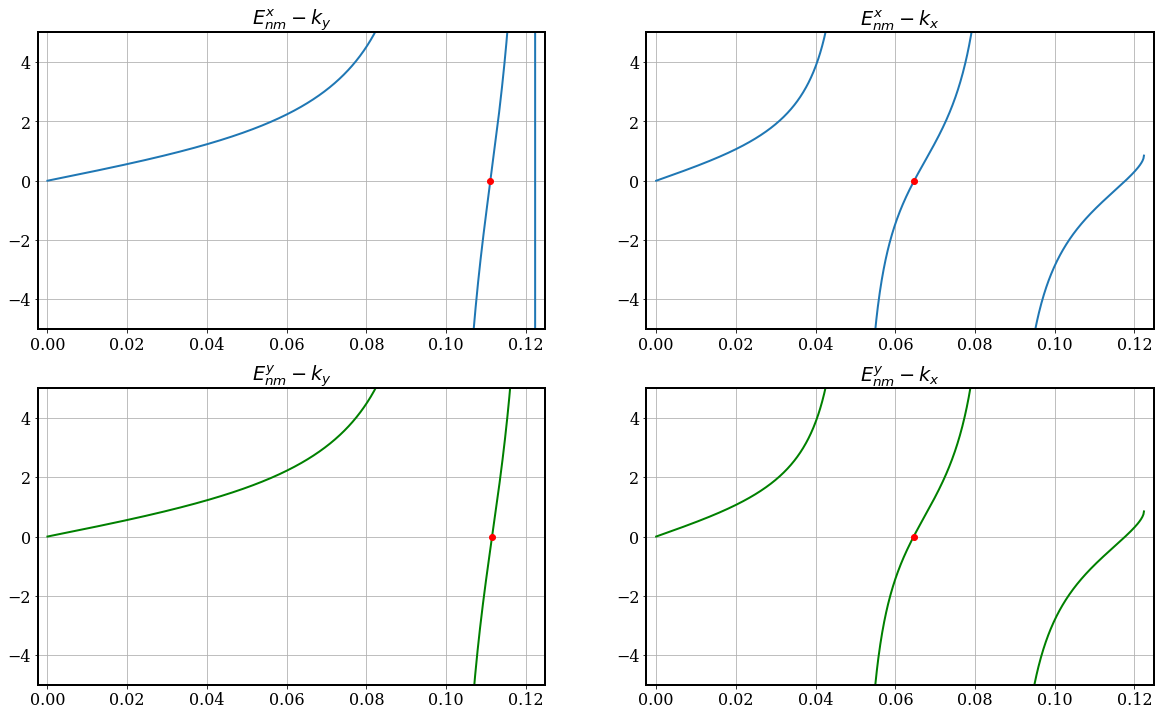

In [ ]:
vFc = 0.02  # View factor for graphing (set to 0 for original view)

font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 16}
fig1, axs1 = plt.subplots(2,2,figsize=(20,12))
plt.rc('font', **font)
plt.rc('axes', linewidth=2)

axs1[0,0].plot(ky/k0, fy_ex, linewidth = 2)
axs1[0,0].plot(ky_exSol/k0, np.zeros(np.size(ky_exSol)), 'ro')
axs1[0,0].set_ylim([-5,5])
axs1[0,0].set_xlim([(-1)*SM.sqrt(n1**2-n2**2)*(vFc)   ,  SM.sqrt(n1**2-n2**2)*(vFc+1)])
axs1[0,0].set_title(r'$E^x_{nm} - k_y$')
axs1[0,0].grid(True)

axs1[0,1].plot(kx/k0, fx_ex, linewidth = 2)
axs1[0,1].plot(kx_exSol/k0, np.zeros(np.size(kx_exSol)), 'ro')
axs1[0,1].set_ylim([-5,5])
axs1[0,1].set_xlim([(-1)*SM.sqrt(n1**2-n2**2)*(vFc)   ,  SM.sqrt(n1**2-n2**2)*(vFc+1)])
axs1[0,1].set_title(r'$E^x_{nm} - k_x$')
axs1[0,1].grid(True)

axs1[1,0].plot(ky/k0, fy_ey, linewidth = 2, color = clrs[2])
axs1[1,0].plot(ky_eySol/k0, np.zeros(np.size(ky_eySol)), 'ro')
axs1[1,0].set_ylim([-5,5])
axs1[1,0].set_xlim([(-1)*SM.sqrt(n1**2-n2**2)*(vFc)   ,  SM.sqrt(n1**2-n2**2)*(vFc+1)])
axs1[1,0].set_title(r'$E^y_{nm} - k_y$')
axs1[1,0].grid(True)

axs1[1,1].plot(kx/k0, fx_ey, linewidth = 2, color = clrs[2])
axs1[1,1].plot(kx_eySol/k0, np.zeros(np.size(kx_eySol)), 'ro')
axs1[1,1].set_ylim([-5,5])
axs1[1,1].set_xlim([(-1)*SM.sqrt(n1**2-n2**2)*(vFc)   ,  SM.sqrt(n1**2-n2**2)*(vFc+1)])
axs1[1,1].set_title(r'$E^y_{nm} - k_x$')
axs1[1,1].grid(True)

In [ ]:
print('kx_exSol = ',kx_exSol)
print('ky_exSol = ',ky_exSol)
print('kx_eySol = ',kx_eySol)
print('ky_eySol = ',ky_eySol)

beta_ex = np.sqrt(k0**2 * n1**2 - kx_exSol**2 - ky_exSol**2)
beta_ey = np.sqrt(k0**2 * n1**2 - kx_eySol**2 - ky_eySol**2)

print('beta_ex = ',beta_ex)
print('beta_ey = ',beta_ey)

neffx = beta_ex/k0
neffy = beta_ey/k0

print('neffx = ',neffx)
print('neffy = ',neffy)

kx_exSol =  406621.0626731417
ky_exSol =  698246.4290296275
kx_eySol =  405878.7655046013
ky_eySol =  700931.6388351317
beta_ex =  9390077.254503403
beta_ey =  9389909.31134037
neffx =  1.4944772110689897
neffy =  1.4944504820844344


## Método índice efetivo

### Modo TE

In [ ]:
ns = 1.495
nc = 1
n_diff = n1 - ns
a = 1e-6

neff = np.linspace(ns,n1,1000)
beta = neff*k0
u = a*k0*np.sqrt(n1**2-neff**2)
v = a*k0*np.sqrt(neff**2-ns**2)
w = a*k0*np.sqrt(neff**2-nc**2)

leftTE = u*(v+w)/(u**2-v*w)
leftTE[:-1][np.diff(leftTE) < -5] = np.nan    # NaN = Not a Number

rightTE = np.tan(2*u)
rightTE[:-1][np.diff(rightTE) < -5] = np.nan    # NaN = Not a Number

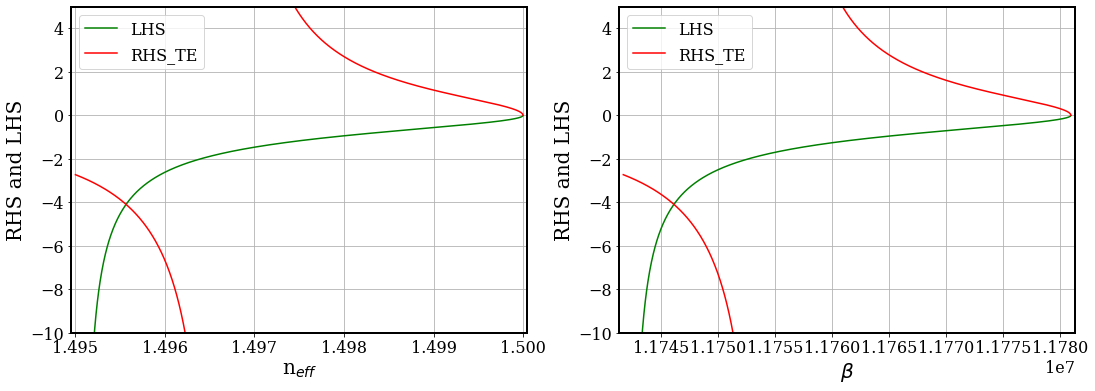

In [ ]:
vFc = 0.01  # View factor for graphing (set to 0 for original view)

font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 16}

figure1, axs = plt.subplots(1, 2, figsize=(18,6))
plt.rc('font', **font)
plt.rc('axes', linewidth=2)

axs[0].plot(neff, leftTE, label = 'LHS', color = colors[2])
axs[0].plot(neff, rightTE, label = 'RHS_TE', color = colors[1])
axs[0].set_xlabel(r'n$_{eff}$', fontsize = 20)
axs[0].set_ylabel(r'RHS and LHS', fontsize = 20)
axs[0].set_xlim([ns - n_diff*vFc ,  n1 + n_diff*vFc])
axs[0].set_ylim([-10,5])
axs[0].legend(loc = 'upper left', fontsize = 16)
axs[0].grid(True)

axs[1].plot(beta, leftTE, label = 'LHS', color = colors[2])
axs[1].plot(beta, rightTE, label = 'RHS_TE', color = colors[1])
axs[1].set_xlabel(r'$\beta$', fontsize = 20)
axs[1].set_ylabel(r'RHS and LHS', fontsize = 20)
axs[1].set_xlim([ns*k0 - n_diff*k0*vFc ,  n1*k0 + n_diff*k0*vFc])
axs[1].set_ylim([-10,5])
axs[1].legend(loc = 'upper left', fontsize = 16)
axs[1].grid(True)